# Experiment data analysis - Network growth

### Read the data from csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the csv
df = pd.read_csv("data/exp3_global_relations_growth_data50.csv")

print("Experiment data analysis - Relations growth")
print("Number of samples:", df["n_sample"].max())
print("Number of RDDAs by sample:", df["n_network"].max())
print("Number of RDDs by RDDA:", df["n_rdds"][0])
print("Number of internal variables:", df["n_variables"][0])
print("Range of Coupling Signals:", df["n_coupling_signals"].min(), "-", df["n_coupling_signals"].max())
print("Range of Total Coupling Signals:", df["n_coupling_signals"].min()* df["n_rdds"][0], "-", df["n_coupling_signals"].max()* df["n_rdds"][0])
df.head(20)

Experiment data analysis - Relations growth
Number of samples: 50
Number of RDDAs by sample: 3
Number of RDDs by RDDA: 5
Number of internal variables: 5
Range of Coupling Signals: 2 - 4
Range of Total Coupling Signals: 10 - 20


,n_sample,n_network,n_rdds,n_variables,n_coupling_signals,n_rdda_attractors,t_find_attractors_method,n_pair_attractors,t_comp_paris_method,n_attractor_fields,t_optimized_method
0,1,1,5,5,2,49,1.703641,417,0.112386,36,0.377605
1,1,2,5,5,3,106,2.156524,3192,0.723555,162,219.001814
2,1,3,5,5,4,139,4.361858,7061,1.710329,5,909.939924
3,2,1,5,5,2,46,0.969933,344,0.087919,18,0.137997
4,2,2,5,5,3,80,2.313519,1690,0.372882,5,18.931903
5,2,3,5,5,4,156,4.269716,9192,1.936776,8,2767.480807
6,3,1,5,5,2,44,1.100431,399,0.093535,25,0.355234
7,3,2,5,5,3,89,2.133501,2374,0.483942,52,148.065474
8,3,3,5,5,4,135,3.740662,6740,1.489737,3,1031.295611
9,4,1,5,5,2,44,1.156292,274,0.069957,16,0.082483


In [2]:
# Time of the experiments
# Time of Experiment (in seg) 244126.750030756
# Time of Experiment (in hours, minutes and seconds) 19:48:46
import time

time_experiment = df[['t_find_attractors_method','t_optimized_method','t_comp_paris_method']].sum().sum()
time_format = time.strftime("%H:%M:%S", time.gmtime(time_experiment))
print("Time experiment (seg.):",time_experiment)
print("Time experiment (hh:mm:ss):",time_format)

Time experiment (seg.): 244125.37303972244
Time experiment (hh:mm:ss): 19:48:45


### Grapichs os the samples

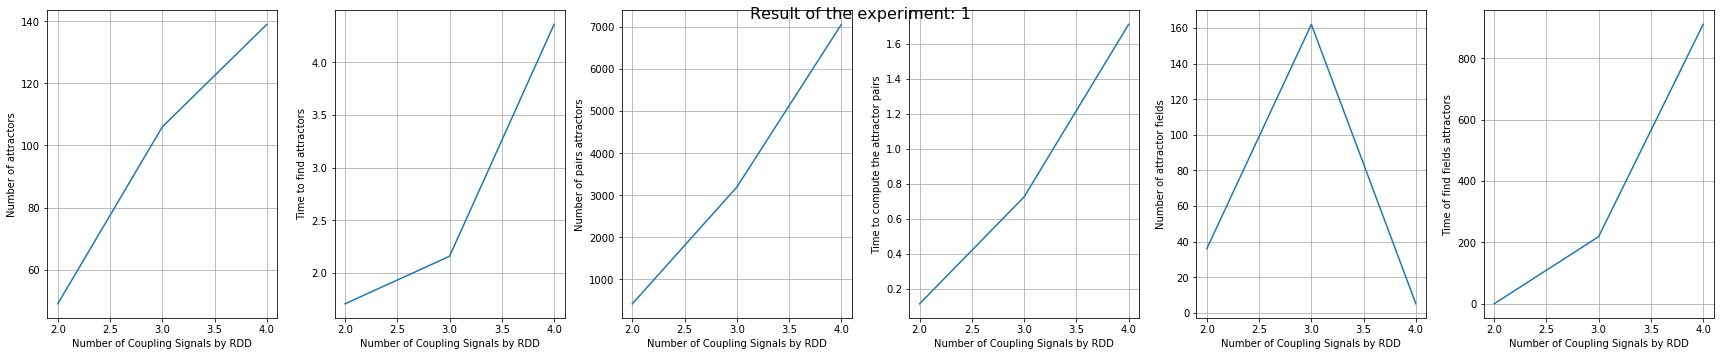

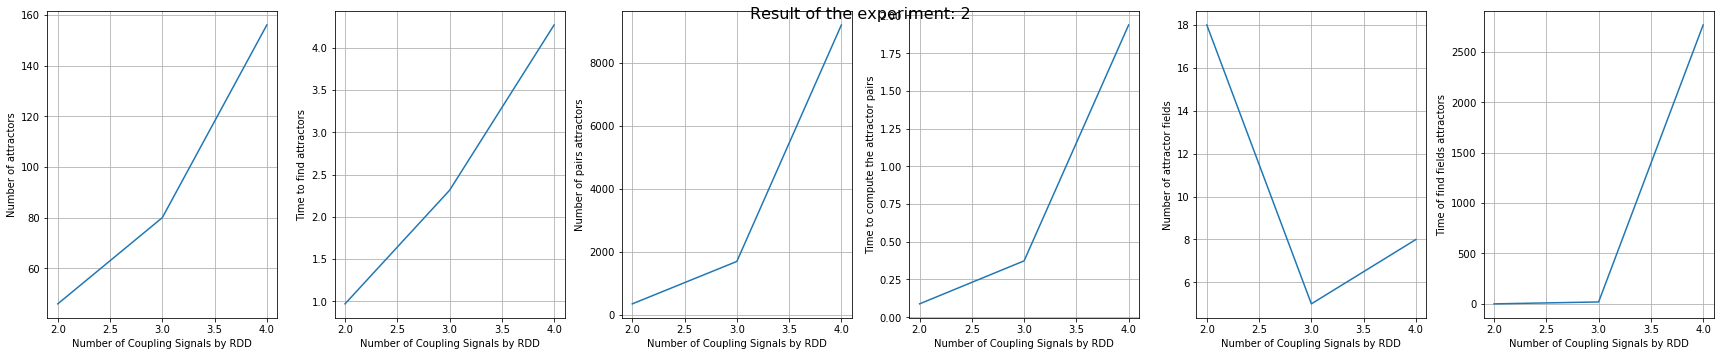

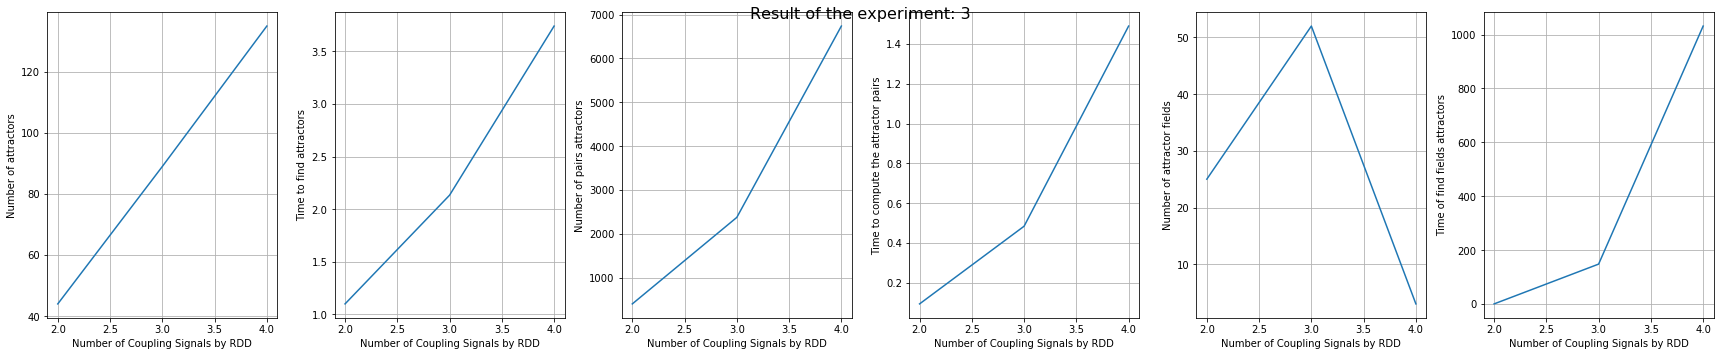

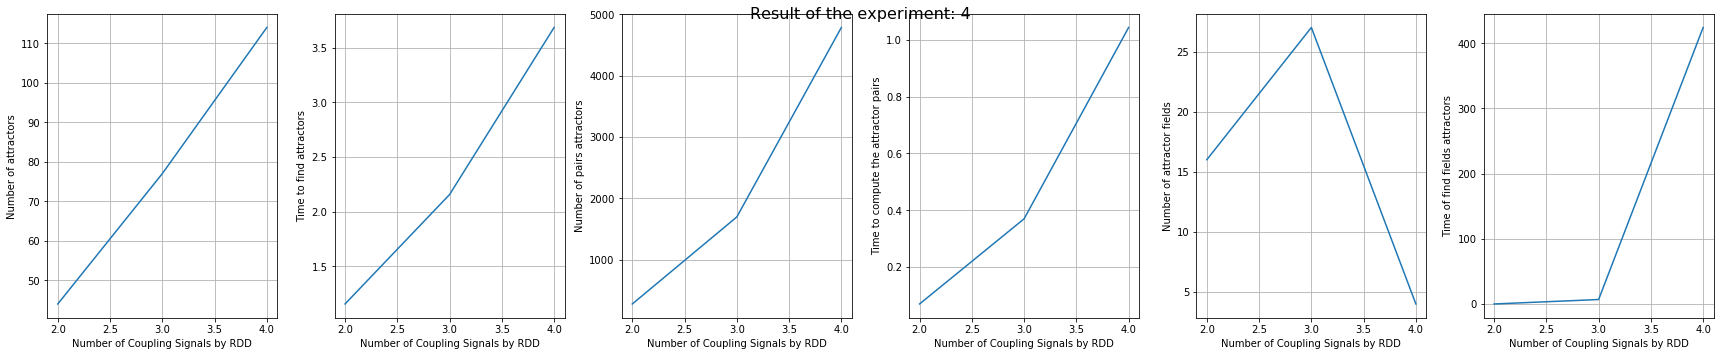

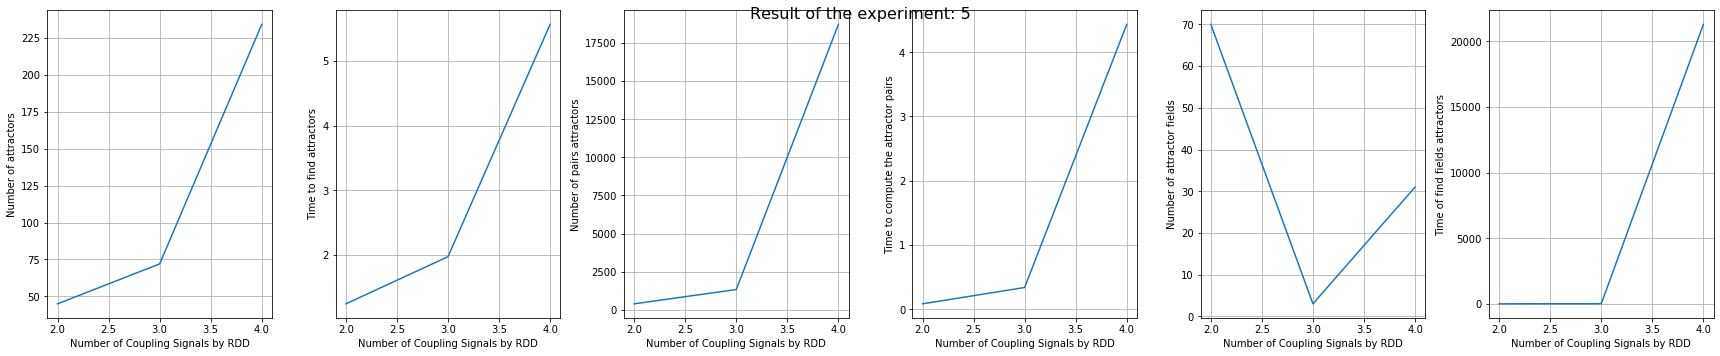

In [3]:
# l_labels_y = ["Number of attractors", "Time to find attractors", "Number of pairs attractors", "Time to compute the attractor pairs", "Number of attractor fields", "Time of find fields attractors"]
grouped = df.groupby("n_sample")
labels = {key:label for key, label in zip(df.keys()[5:], [
          "Number of attractors",
          "Time to find attractors",
          "Number of pairs attractors",
          "Time to compute the attractor pairs",
          "Number of attractor fields",
          "Time of find fields attractors"])}

for number in np.array(list(grouped.groups.keys()))[:5]:
    group = grouped.get_group(number)
    fig_, axs = plt.subplots(1,6,figsize=(24,5))
    for (ax, key) in zip(axs, group.keys()[5:]):
        ax.plot(group['n_coupling_signals'], group[key])
        ax.set_xlabel('Number of Coupling Signals by RDD')
        ax.set_ylabel(labels[key])
        ax.grid(True)
    fig_.suptitle('Result of the experiment: ' + str(number), fontsize=16)
    fig_.tight_layout()

### Boxplot for every indicator - General vision

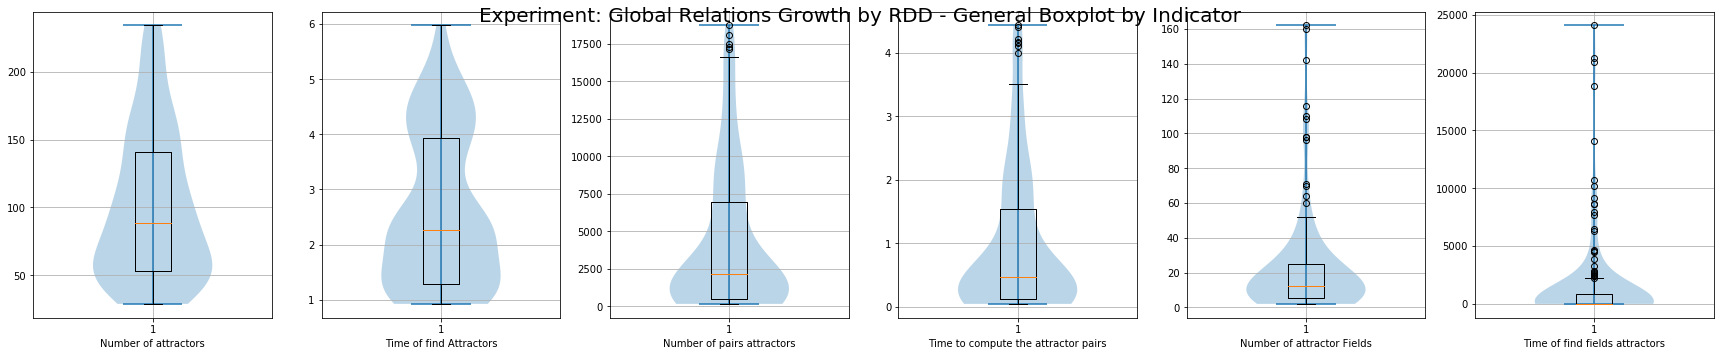

In [4]:
# General Boxplot by Indicator
l_labels_y = ["Number of attractors", "Time of find Attractors", "Number of pairs attractors", "Time to compute the attractor pairs", "Number of attractor Fields", "Time of find fields attractors"]

fig_, axs = plt.subplots(1,6,figsize=(24,5))
cont_label = 0
for (key,ax) in zip(df.keys()[5:], axs):
    ax.boxplot(df[key])
    ax.violinplot(df[key])
    ax.set_xlabel(l_labels_y[cont_label])
    ax.grid(True)
    cont_label += 1
fig_.suptitle('Experiment: Global Relations Growth by RDD - General Boxplot by Indicator', fontsize=20)
fig_.tight_layout()

### Boxplot for every Indicator - Indicator across all the samples for every number of RDDs

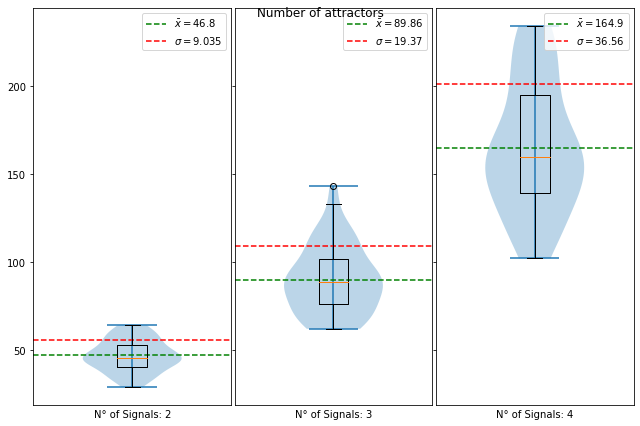

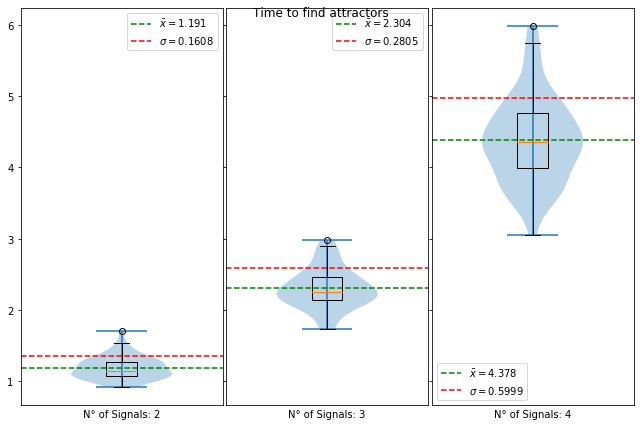

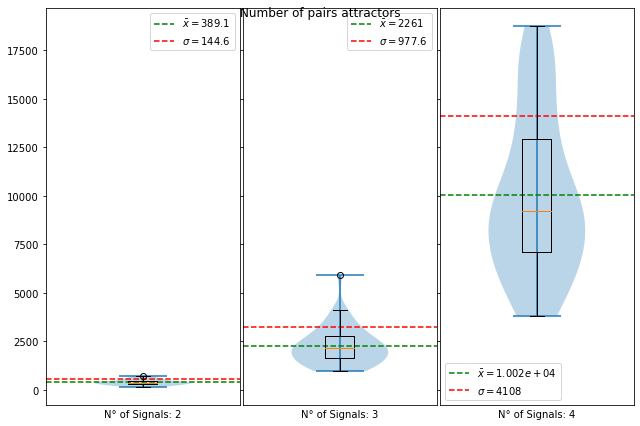

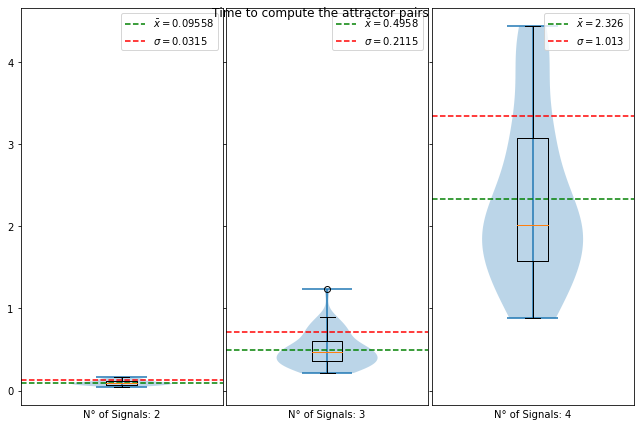

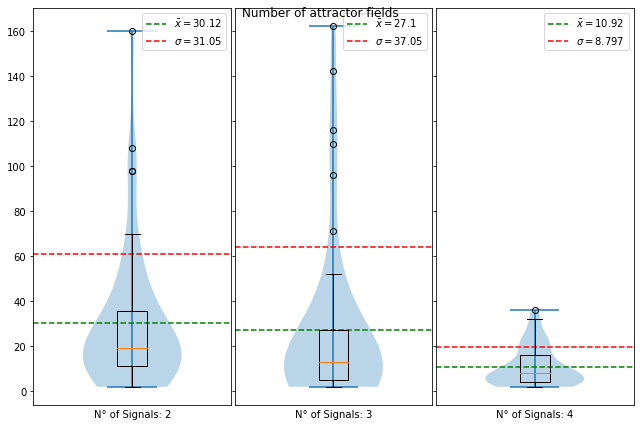

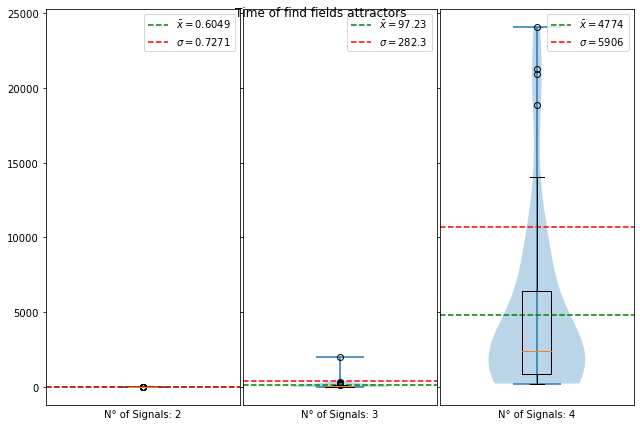

In [5]:
n_rdds = df['n_coupling_signals'].unique()
labels = {key:label for key, label in zip(df.keys()[5:], [
          "Number of attractors",
          "Time to find attractors",
          "Number of pairs attractors",
          "Time to compute the attractor pairs",
          "Number of attractor fields",
          "Time of find fields attractors"])}
log_scale = {key:label for key, label in zip(df.keys()[5:], [
          False,
          False,
          True,
          True,
          True,
          True])}
grouped = df.groupby("n_coupling_signals")

for key in df.keys()[5:]:
    fig, axs = plt.subplots(1, n_rdds.size, figsize=(n_rdds.size*3,6), sharey=True)
    for ax, n_rdd in zip(axs, n_rdds):
        group = grouped.get_group(n_rdd)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g',ls='--',label=fr'$\bar{{x}}={data.mean():.4g}$')
        #std_min = ax.axhline(y=data.mean()-data.std(), xmin=0.0, xmax=1.0, color='r',ls='--')
        std_max = ax.axhline(y=data.mean()+data.std(), xmin=0.0, xmax=1.0, color='r',ls='--',label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        #if log_scale[key]:
        #ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'N° of Signals: {n_rdd}')
        ax.set_xticks([])
        ax.set_xlim((0.5,1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)